# Final Model Evaluation on Unseen Test Data (Logistic Regression)

This notebook evaluates our final Logistic Regression model on the test dataset.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import joblib 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## 2. Load Data and Model

In [3]:
# Load the trained model
try:
    model= joblib.load('../models/final_model.pkl')
    print("Tuned Logistic Regression Model loaded successfully.")
except FileNotFoundError:
    print("Error: 'final_model.pkl' not found.")
    print("Please ensure you have run the training script to save the model.")

# Load the processed data
try:
    test_df= pd.read_csv('../data/processed/test.csv')
    print("Processed test data loaded successfully.")
except FileNotFoundError:
    print("Error: '../data/processed/test.csv' not found.")
    print("Please ensure you have run the preprocessing.py script first.")

Tuned Logistic Regression Model loaded successfully.
Processed test data loaded successfully.


## 3. Prepare the Data

In [5]:
X_test= test_df.drop('target', axis=1)
y_test= test_df['target']

print(f"Test set feature shape: {X_test.shape}")
print(f"Test set target shape: {y_test.shape}")

Test set feature shape: (201, 21)
Test set target shape: (201,)


## 4. Evaluation

### Prediction

In [7]:
y_pred= model.predict(X_test)

print("-- Final Model Evaluation --")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

-- Final Model Evaluation --
Accuracy: 0.8756


### Classification Report

In [9]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        99
           1       0.85      0.92      0.88       102

    accuracy                           0.88       201
   macro avg       0.88      0.87      0.88       201
weighted avg       0.88      0.88      0.88       201



#### **Interpretation:** The tuned Logistic Regression model achieves a strong accuracy of **87.56%** on the unseen test data. The **recall** for class 1 (Disease) is now very high at **0.92**, which is crucial for minimizing false negatives in a medical context.

### Confusion Matrix

In [12]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[82 17]
 [ 8 94]]


## Evaluation Heatmap

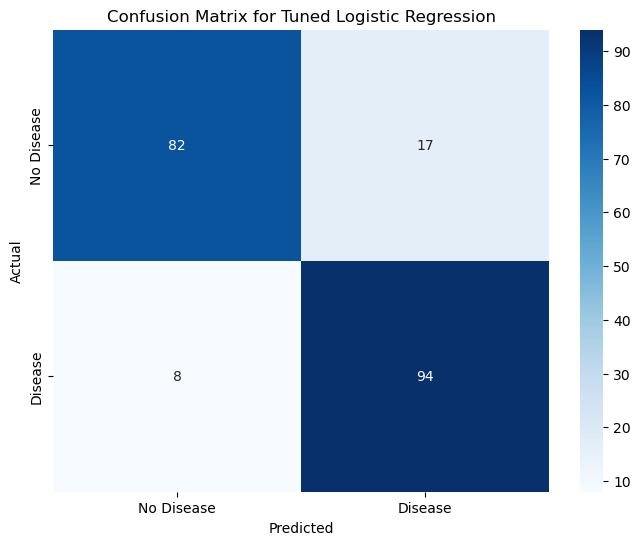

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.title("Confusion Matrix for Tuned Logistic Regression")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=["No Disease", "Disease"],yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 5. Advanced Analysis & Interpretation

### ROC Curve and AUC Score

AUC Score: 0.9343


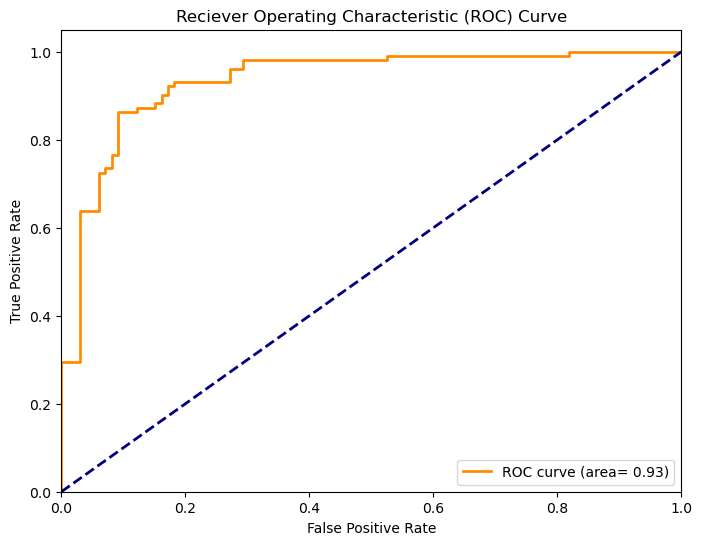

In [16]:
y_pred_proba= model.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC score
fpr, tpr, threshold= roc_curve(y_test, y_pred_proba)
roc_auc= auc(fpr, tpr)

print(f"AUC Score: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.title('Reciever Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, color='darkorange', lw= 2, label=f'ROC curve (area= {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw= 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### **Interpretation:** An AUC score close to 1.0 indicates an excellent model. Our score suggests the model has a very good ability to distinguish between patients with and without heart disease across all classification thresholds.

### Feature Importance

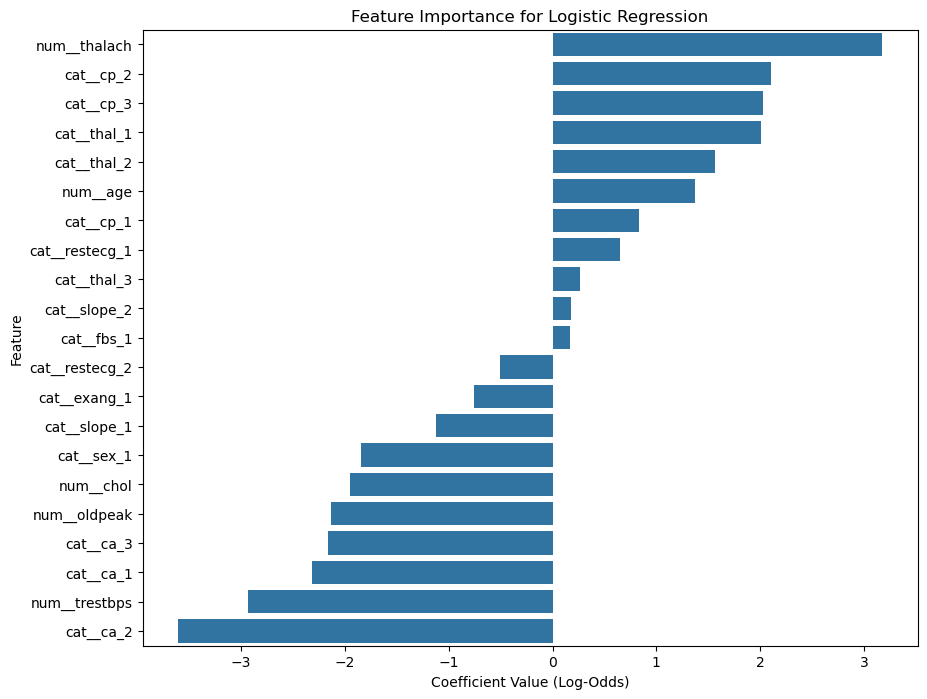

In [20]:
# Extract coefficients from logistic regression model
coefficients= model.coef_[0]
feature_names= X_test.columns

# Create a DataFrame for better visualisation
feature_importance= pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
feature_importance= feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for Logistic Regression")
sns.barplot(x='Importance', y='Feature', data= feature_importance)
plt.xlabel('Coefficient Value (Log-Odds)')
plt.ylabel('Feature')
plt.show()

#### **Interpretation:** This chart shows which features most heavily influence the model's predictions.
#### - **Positive Coefficients:** Features with positive values (e.g., `cp_1`, `cp_2`, `cp_3` for different types of chest pain) increase the log-odds (and thus the probability) of predicting heart disease.
#### - **Negative Coefficients:** Features with negative values (e.g., `sex_0` for female, `ca_0` for zero major vessels colored by fluoroscopy) decrease the log-odds of predicting heart disease.

## 6. Conclusion

The tuned Logistic Regression model demonstrates strong and reliable performance on the unseen test data. With an accuracy of **87.56%** and a high AUC score, it is a robust model for this classification task. The feature importance analysis provides valuable, interpretable insights into the key predictors of heart disease according to the model.

This model is now validated and ready for use in a prediction pipeline.